# gsi_sim Example

Rather than a rigourous analysis, the goal of this notebook is to explore the functionality of gsi_sim

gsi_sim citations:

    - Anderson, Eric C., Robin S. Waples, and Steven T. Kalinowski. "An improved method for predicting the accuracy of genetic stock identification." Canadian Journal of Fisheries and Aquatic Sciences 65, no. 7 (2008): 1475-1486.
    
    - Anderson, E. C. "Assessing the power of informative subsets of loci for population assignment: standard methods are upwardly biased." Molecular ecology resources 10, no. 4 (2010): 701-710.

gsi_sim is available at: [https://github.com/eriqande/gsi_sim](https://github.com/eriqande/gsi_sim)

#### Dataset:
preliminary data from:

Larson, Wesley A., et al. "Single-nucleotide polymorphisms (SNPs) identified through genotyping-by-sequencing improve genetic stock identification of Chinook salmon (Oncorhynchus tshawytscha) from western Alaska." Canadian Journal of Fisheries and Aquatic Sciences 71.5 (2014): 698-708.

#### Python imports

In [1]:
import numpy


ImportError: /home/ipseg/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/core/multiarray.so: undefined symbol: PyUnicodeUCS2_AsASCIIString

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

ImportError: /home/ipseg/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/core/multiarray.so: undefined symbol: PyUnicodeUCS2_AsASCIIString

#### Plot formatting

In [18]:
from IPython.core.pylabtools import figsize
sns.set(font_scale=2)
sns.set_style("white")
%matplotlib inline

#### Paths to important files

In [2]:
!pwd

/home/ipseg/Desktop/waples/chinook_gsi_example


In [1]:
GSISIM_PATH = '/home/ipseg/Programs/gsi_sim/gsisim'
BASELINE = 'baseline.txt'
REPORTING_GROUPS = 'reporting_groups.txt'

#### Populations and reporting groups

In [5]:
Image(url='http://www.nrcresearchpress.com/na101/home/literatum/publisher/nrc/journals/content/cjfas/2014/cjfas.2014.7105/cjfas-2013-0502/20140331/images/large/cjfas-2013-0502tab1.jpeg')

REPUNIT Norton:

    -KGOLS06	Golsovia R.    
    -KNORTH10	North R.
    -KPILG0506	Pilgrim R
    -KTUBU09	Tubutulik R.
  
REPUNIT Upper_Yukon:

    -KBIGS07 	Big Salmon R.
  
REPUNIT Middle_Yukon:	

    -KHENS01 	Henshaw C,
    -KKANT05	Kantishna R.
    -KSALC05	Salcha R.
  
REPUNIT Lower_Yukon:

    -KANDR03	Andreafsky R.
    -KANVI07 	Anvik R.
    -KGISA01 	Gisasa R.
  
REPUNIT Bristol_Bay_Kusk:

    -KKLUTU09	Klutuspak R.
    -KKOGR05	Kogrukluk R. 05
    -KKOGR07	Kogrukluk R. 07
    -KKOKT10	Koktuli R.
    -KNECO07	Necons R.
    -KAROL05	Arolik R.
    -KBIGCK04	Big C.
    -KEEK05	Eek R.
    -KGAGA06	Gagaryah R.
    -KGEOR05	George R.
    -KGONF06	Goodnews R.
    -KKISA05	Kisaralik R.
    -KIOW10	Iowithla R.
    -KKANE05	Kanektok R,
    -KSALM06	Salmon R.
    -KSTUY09	Stuyahok R.
    -KTOGRT09	Togiak R.

#### Space reserved to specify population and reporting group colors

## Evaluate Baseline

#### test for possible duplicate samples in baseline
Using the '--close-match-base' command.  
This reports pairs of individuals with _XX_ (or fewer) mismatching genotypes out of at least _YY_ loci.

This same test can also be run on mixture files ('--close-match-mix').

In [6]:
close_matches = !{GSISIM_PATH} --baseline-genotypes baseline.txt \
--close-match-base 10 200

In [7]:
close_matches.grep('CLOSE_MATCH_GENOTYPES')

['CLOSE_MATCH_GENOTYPES: KANDR03_4 and KANDR03_19 differ at 0 genotypes out of 281 non-missing loci',
 'CLOSE_MATCH_GENOTYPES: KANVI07_6 and KANVI07_24 differ at 0 genotypes out of 281 non-missing loci',
 'CLOSE_MATCH_GENOTYPES: KANVI07_19 and KANVI07_31 differ at 0 genotypes out of 275 non-missing loci',
 'CLOSE_MATCH_GENOTYPES: KGEOR05_4 and KGEOR05_49 differ at 1 genotypes out of 281 non-missing loci',
 'CLOSE_MATCH_GENOTYPES: KGEOR05_6 and KGEOR05_7 differ at 0 genotypes out of 280 non-missing loci',
 'CLOSE_MATCH_GENOTYPES: KGEOR05_6 and KGEOR05_84 differ at 0 genotypes out of 281 non-missing loci',
 'CLOSE_MATCH_GENOTYPES: KGEOR05_7 and KGEOR05_84 differ at 0 genotypes out of 280 non-missing loci',
 'CLOSE_MATCH_GENOTYPES: KGEOR05_8 and KGEOR05_72 differ at 0 genotypes out of 281 non-missing loci',
 'CLOSE_MATCH_GENOTYPES: KGEOR05_11 and KGEOR05_90 differ at 1 genotypes out of 280 non-missing loci',
 'CLOSE_MATCH_GENOTYPES: KGEOR05_12 and KGEOR05_73 differ at 2 genotypes out of 2

### z-scores of baseline individuals
Using the command
"--base-logl-sims"

from the gsisim --help: 

"for every fish in the baseline, J1 new genotypes will be simulated from the reference population that fish comes from and the loglikelihood of these simulated fish will be compared to the log likelihood of the fish in the baseline. z-scores and quantiles are reported in standard output on tagged lines."

#### gsi_sim: calculate z scores

In [13]:
!{GSISIM_PATH} \
--baseline-genotypes ./baseline.txt \
--rep-unit-file ./reporting_groups.txt \
--base-logl-sims 5000 -1 \
--self-assign \
--leave-one-out yes \
> ./baseline_z_scores.log

#### plot z-scores

In [14]:
def plot_z_scores(logl_summary_file):
    z_scores = pd.read_csv(logl_summary_file, sep = "\t")
    z_scores['zScore'].hist(bins = 30)
    plt.xlabel('z score')
    plt.ylabel('# of individuals')
    sns.despine()
    plt.show()

Negative z-scores show individuals with unlikely genotypes given their source population.  This z-score is a measure of how well individuals fit in their baseline population that is **independent** of the other populations present in the baseline. A leave-one-out assignment procedure (see below) depends on all the populations in the baseline.

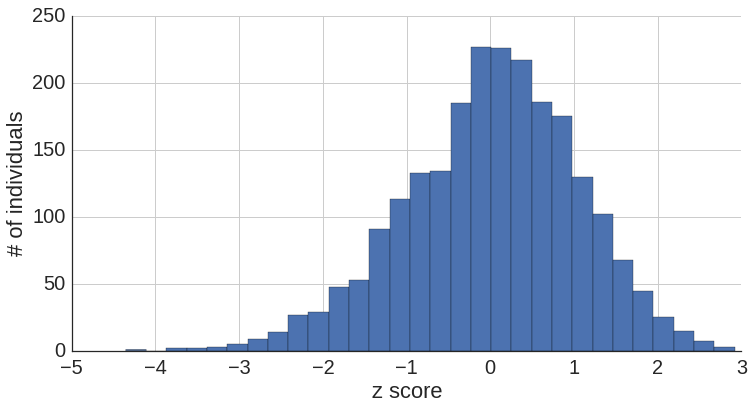

In [19]:
figsize(12,6)
plot_z_scores('/home/ipseg/Desktop/waples/chinook_gsi_example/baseline_logl_summary.txt')

### Genotype likelihood z-scores per population (box plot)

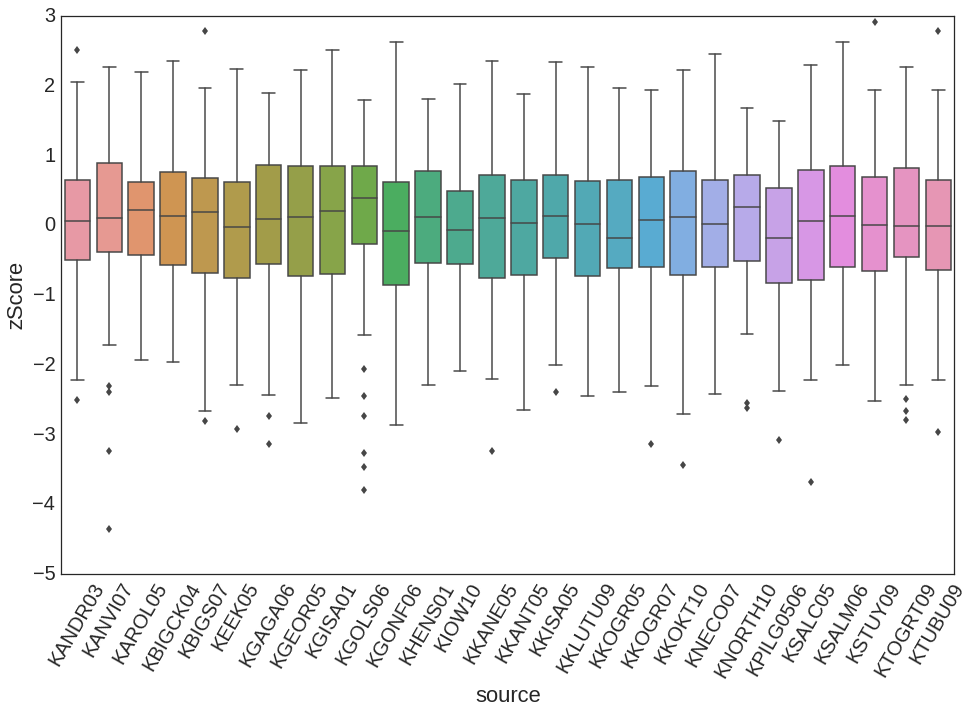

In [20]:
figsize(16,10)
zs = pd.read_csv('/home/ipseg/Desktop/waples/chinook_gsi_example/baseline_logl_summary.txt', sep = "\t")
sns.boxplot(zs['zScore'][:-1], groupby = zs['AssignedTo'][:-1], fliersize = 6)
plt.xlabel('source')
plt.xticks(rotation=60)
plt.show()

## self-assignment of baseline individuals
with "--self-assign"

Look for output lines with: "UNSORTED_SELF_ASS_LIKE_GC_CSV"

gsi_sim does not reference reporting units in output

#### gsi_sim command

In [21]:
!{GSISIM_PATH} \
--baseline-genotypes ./baseline.txt \
--rep-unit-file ./reporting_groups.txt \
--self-assign \
--leave-one-out yes \
> ./self_assign.log

#### functions to parse gsi_sim out put

In [22]:
def get_ind_UNSORTED_SELF_ASS(line):
    start_at_ind = line.split(':/')[1]
    ind = start_at_ind.split(';')[0]
    return(ind)

def get_assigns_UNSORTED_SELF_ASS(line):
    prob_of_pop = dict()
    assigns = line.split(';;')
    
    first_assign = assigns[0]
    first_assign_pop = first_assign.split(';')[1]
    first_assign_prob = np.float64(first_assign.split(';')[2])
    prob_of_pop[first_assign_pop] = first_assign_prob
    del assigns[0]
    
    last_assign = assigns[-2]
    last_assign_pop = last_assign.split(';')[0]
    last_assign_prob = np.float64(last_assign.split(';')[1])
    prob_of_pop[last_assign_pop] = last_assign_prob
    del assigns[-2:]
    # get the rest
    for pair in assigns:
        popname, prob = pair.split(';')
        prob_of_pop[popname] = np.float64(prob)
    
    return(prob_of_pop)

In [23]:
self_assign = !grep 'UNSORTED_SELF_ASS_LIKE_GC_CSV' self_assign.log

In [24]:
self_assignments = pd.DataFrame.from_dict([get_assigns_UNSORTED_SELF_ASS(xx) for xx in self_assign])
self_assignments.index = [get_ind_UNSORTED_SELF_ASS(xx) for xx in self_assign]

#### Leave-one-out results

In [25]:
self_assignments.head()

KANDR03  KANVI07  KAROL05  KBIGCK04  KBIGS07  KEEK05  KGAGA06  \
KANDR03_1   71.702    3.186    0.506     0.064        0   0.144    0.042   
KANDR03_2   36.160    0.019    0.064     2.009        0   0.285    1.807   
KANDR03_3    1.699    0.000    0.100     9.502        0  45.291    1.232   
KANDR03_4   98.417    0.001    0.026     0.000        0   0.048    0.021   
KANDR03_5   94.133    5.216    0.003     0.019        0   0.045    0.050   

           KGEOR05  KGISA01  KGOLS06   ...     KKOGR07  KKOKT10  KNECO07  \
KANDR03_1    8.002    8.091    0.001   ...       0.378    0.263    0.137   
KANDR03_2    0.000    4.533    0.000   ...       0.043    1.902    0.232   
KANDR03_3    0.676   12.556    0.005   ...       2.079    0.119    0.673   
KANDR03_4    0.074    0.003    0.003   ...       0.017    0.050    0.006   
KANDR03_5    0.001    0.444    0.000   ...       0.003    0.000    0.000   

           KNORTH10  KPILG0506  KSALC05  KSALM06  KSTUY09  KTOGRT09  KTUBU09  
KANDR03_1     0.005      0.000        0    4.067    0.010     0.082        0  
KANDR03_2     0.141      0.002        0    0.036   15.318    24.719        0  
KANDR03_3     0.636      0.291        0    2.181    0.478     0.033        0  
KANDR03_4     0.000      0.002        0    0.037    0.104     0.506        0  
KANDR03_5     0.006      0.000        0    0.018    0.001     0.000        0  

[5 rows x 28 columns]

#### Heatmap of likelihood-based population assignment, per baseline individual
each row is an individual in the baseline, sorted by population.

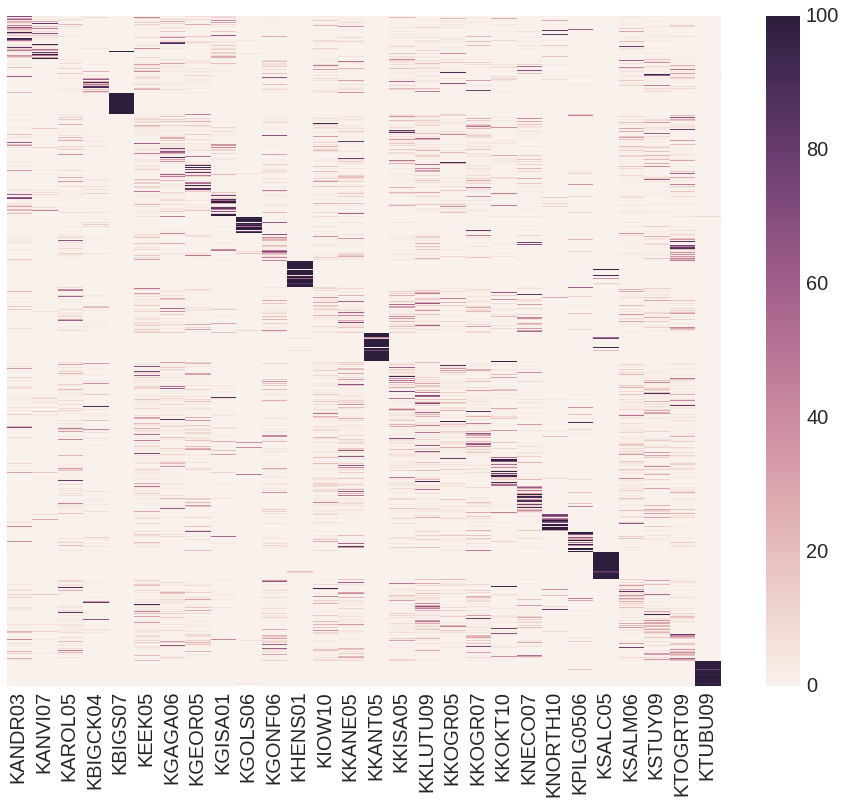

In [26]:
figsize(16, 12)
sns.heatmap(self_assignments, linewidths = 0, yticklabels = False)
plt.show()

### Self-assignment of baseline individuals, mean assignment per population.

In [18]:
self_assignments['source'] = [xx.split("_")[0] for xx in self_assignments.index]
mean_assignment=self_assignments.groupby('source').mean()

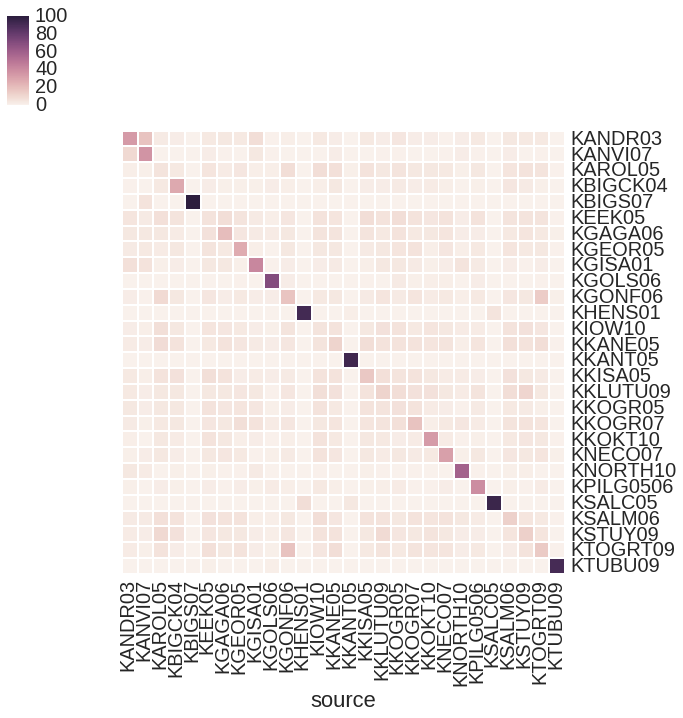

In [19]:
figsize(16,12)
sns.clustermap(mean_assignment.T,col_cluster=False, row_cluster=False)
plt.show()

## Simulations

### Simulate individuals

#### simulates X individuals from each population and assigns them
the unit to re-sample from the baseline can be one of:
    - alelles ('gene')
    - genotypes ('loci')
    - multi-locus genotype ('multilocus')
for discussion see Anderson et al (2008), here i'll be using 'genes'

#### gsi_sim command

In [27]:
!{GSISIM_PATH} \
--baseline-genotypes ./baseline.txt \
--rep-unit-file ./reporting_groups.txt \
--ind-sim  1000 \
--samp-unit genes \
--leave-one-out yes \
> ./sim_ind.log

#### parse gsi_sim output
found on lines with "SIMPLE_IND_SIM"

In [28]:
def get_popnames_SIMPLE_IND_SIM(sim_ind_file):
    header_line = !grep 'SIMPLE_IND_NAMES_HEADER' {sim_ind_file}
    pop_names = header_line[0].split()[4:]
    return(pop_names)

def get_assigns_SIMPLE_IND_SIM(line, pop_names):
    line = line.split()
    ind_sim_dict = dict(zip(pop_names, [np.float64(xx) for xx in line[4:]]))
    ind_sim_dict['popname'] = line[3]
    ind_sim_dict['rep'] = np.int(line[1])
    return(ind_sim_dict)

In [29]:
pop_names = get_popnames_SIMPLE_IND_SIM('sim_ind.log')
sim_ind_lines = !grep 'SIMPLE_IND_SIM' sim_ind.log

In [30]:
sim_inds = pd.DataFrame.from_dict([get_assigns_SIMPLE_IND_SIM(xx, pop_names = pop_names) for xx in sim_ind_lines])

In [31]:
mean_assignment = sim_inds.sort(columns='popname').groupby('popname').mean().drop('rep', 1)

#### Assignment of 1000 simulated individuals from each population

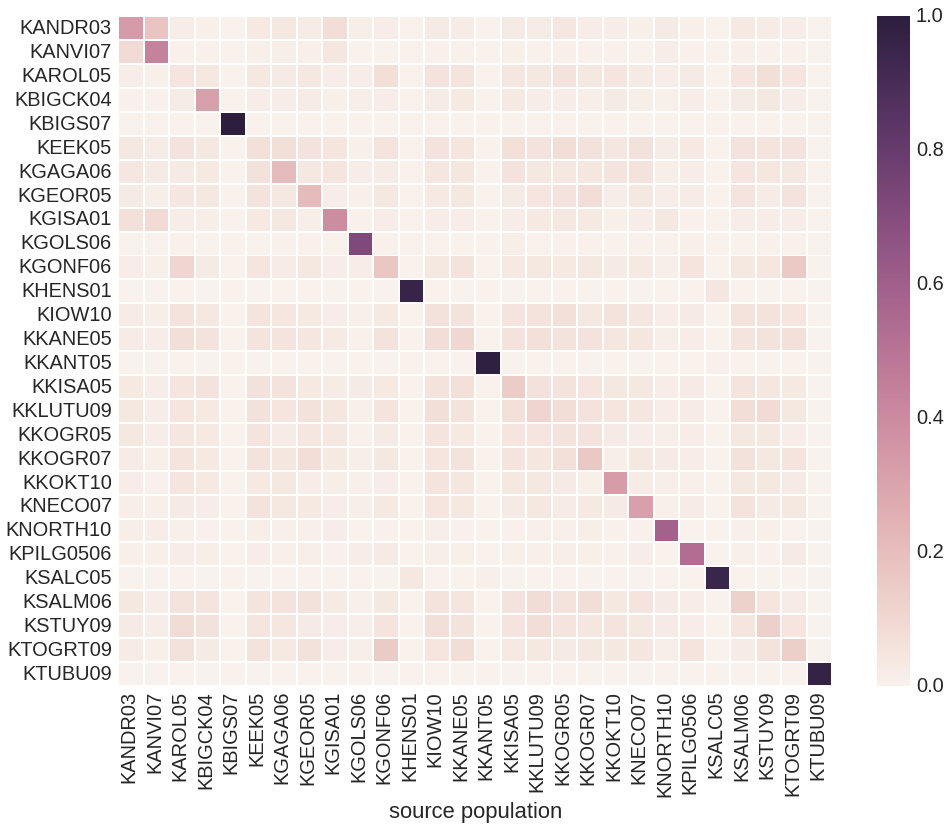

In [32]:
sns.heatmap(mean_assignment.T)
plt.xlabel('source population')
plt.show()

###  Source populations clustered based on assignment vectors
Same data as above. Uses the [UPGMA](http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) clutering method.

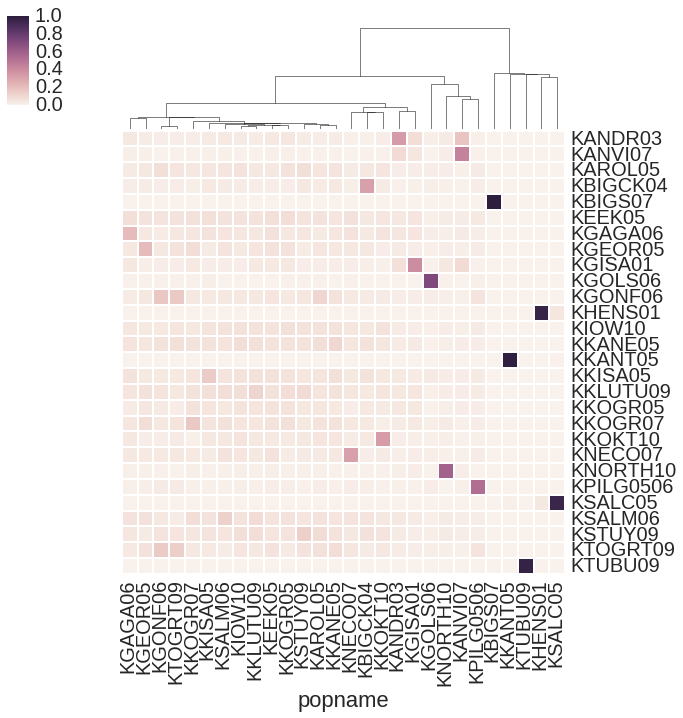

In [33]:
sns.clustermap(mean_assignment.T, row_cluster= False)
plt.show()

## Simulate mixtures

#### Simulate 100% mixtures 
one for each population.

#### gsi_sim command
gsi_sim seems to ignore reporting units when producing output

In [34]:
def mix100_of_pop(popname):
    !{GSISIM_PATH} \
    --baseline-genotypes ./baseline.txt \
    --rep-unit-file ./reporting_groups.txt \
    -n {popname} --Pi 1 --end-pop \
    --mixed-fishery  10 1000 \
    --samp-unit genes \
    --leave-one-out yes \
    > {'{}_100.log'.format(popname)}

In [35]:
popnames = list(set(zs['AssignedTo']))

In [36]:
for xx in popnames:
    mix100_of_pop(xx)

####  parse Individual assignment
this could be adapted to use reporting groups

In [37]:
def get_popnames_MIXED_FISH(mix_file):
    header_lines = !grep 'MIXFISH_NAMES_HEADER' {mix_file}
    #print(header_lines)
    pop_names = header_lines[0].split()[5:]
    return(pop_names)

def get_assigns_MIXED_FISH(line, pop_names):
    line = line.split()
    sim_dict = dict(zip(pop_names, [np.float64(xx) for xx in line[6:]]))
    sim_dict['source'] = line[5]
    sim_dict['rep'] = np.int(line[2])
    sim_dict['ind'] = np.int(line[3])    
    return(sim_dict)

In [38]:
pop_names = get_popnames_MIXED_FISH('KANDR03_100.log')
kandro3_lines = !grep 'MIXFISH_PI_MLES' KANDR03_100.log
kandro_assigns = pd.DataFrame.from_dict([dict(zip(pop_names, [np.float64(yy) for yy in xx.split()[1:]])) for xx in kandro3_lines])

### Assignment Matrix - 100% simulations
for one of the 28 populations

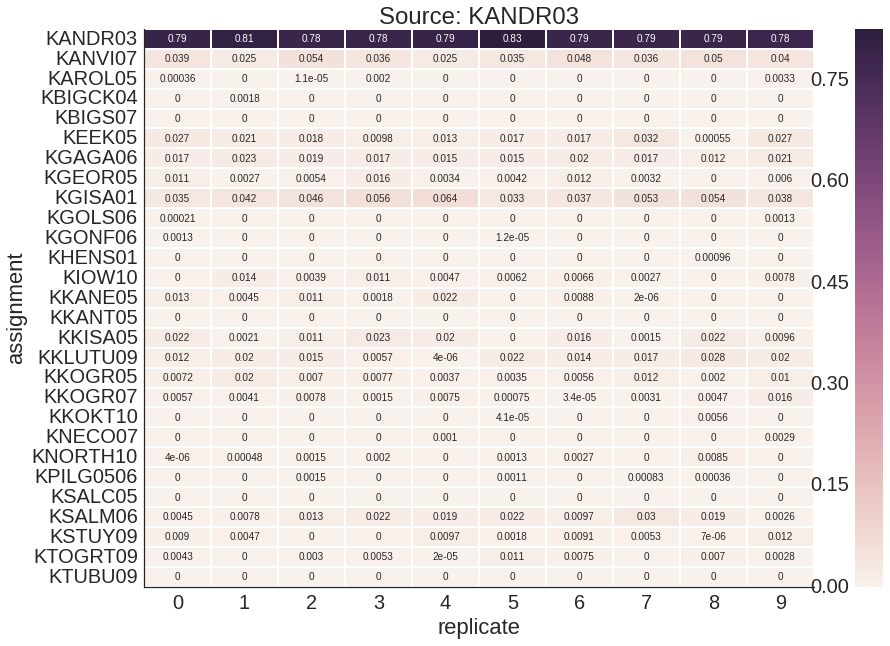

In [39]:
figsize(15,10)
sns.heatmap(kandro_assigns.T,annot=True )
plt.xlabel('replicate')
plt.ylabel('assignment')
plt.title('Source: KANDR03')
sns.despine()
plt.show()

#### MAke a similar plot for each population

In [69]:
def plot_100_sim(logfile):
    pop_names = get_popnames_MIXED_FISH(logfile)
    PI_MLES_lines = !grep 'MIXFISH_PI_MLES' {logfile}
    PI_MLES_assigns = pd.DataFrame.from_dict([dict(zip(pop_names, [np.float64(yy) for yy in xx.split()[1:]])) for xx in PI_MLES_lines])
    sns.heatmap(PI_MLES_assigns.T, vmin = 0.0, vmax = 1.0, annot=True, fmt = '.2f'  )
    plt.xlabel('replicate')
    plt.ylabel('assignment')
    plt.title('Source: {}'.format(logfile))
    sns.despine()
    plt.show()

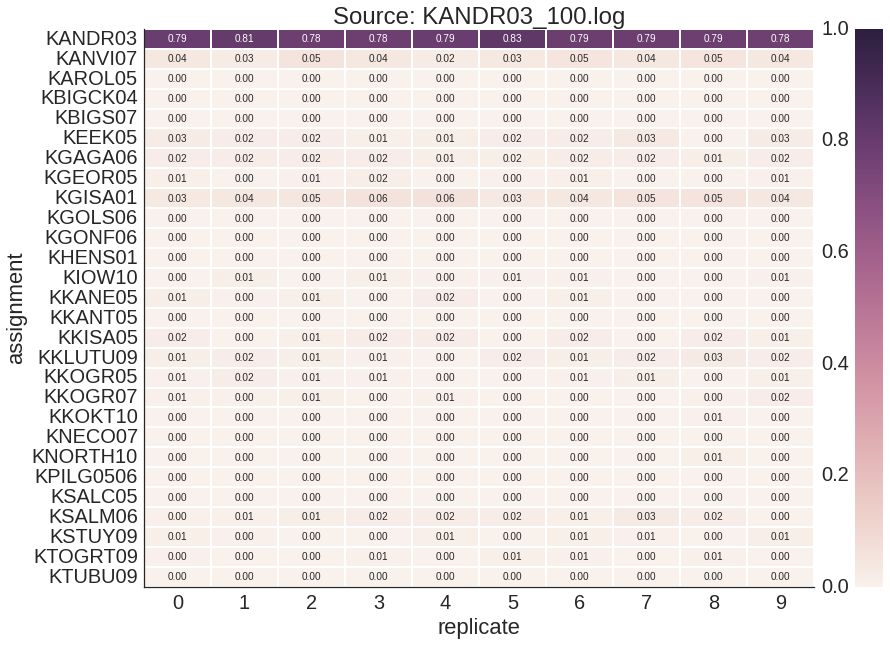

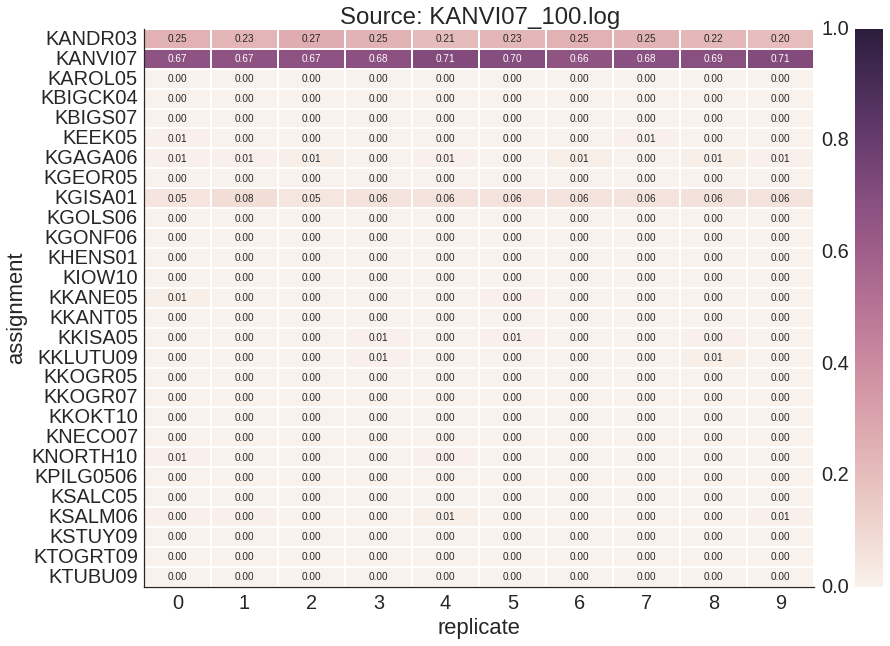

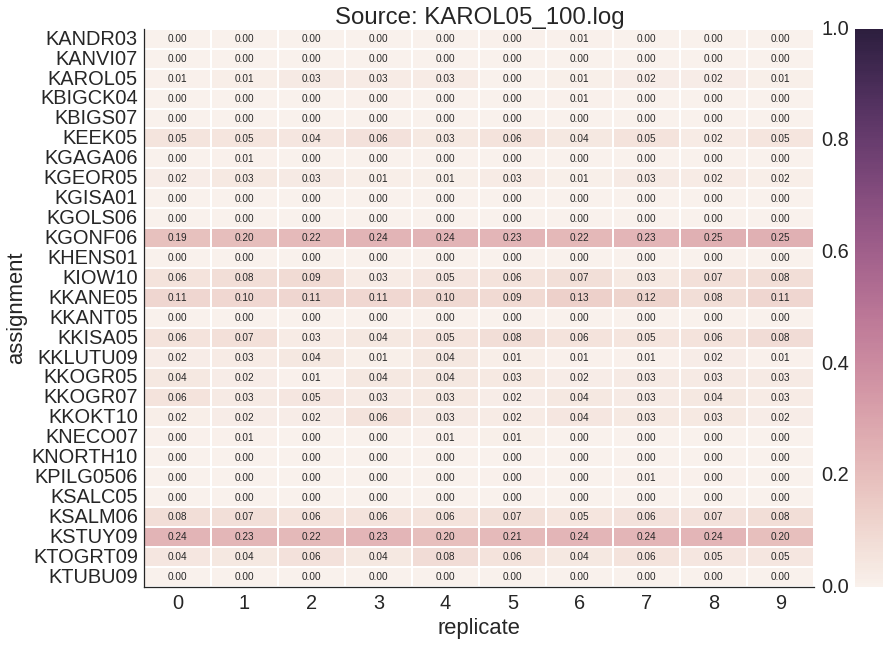

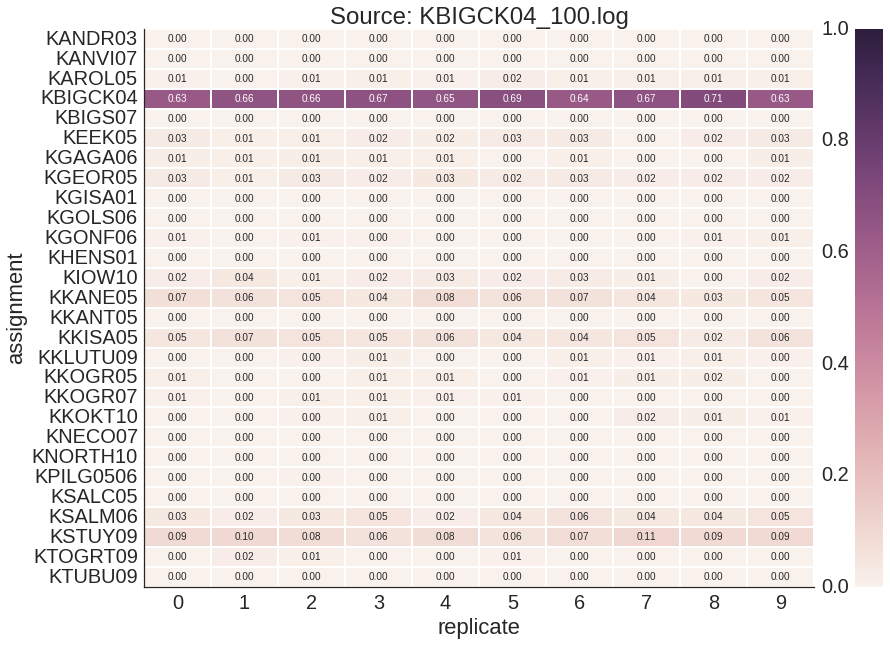

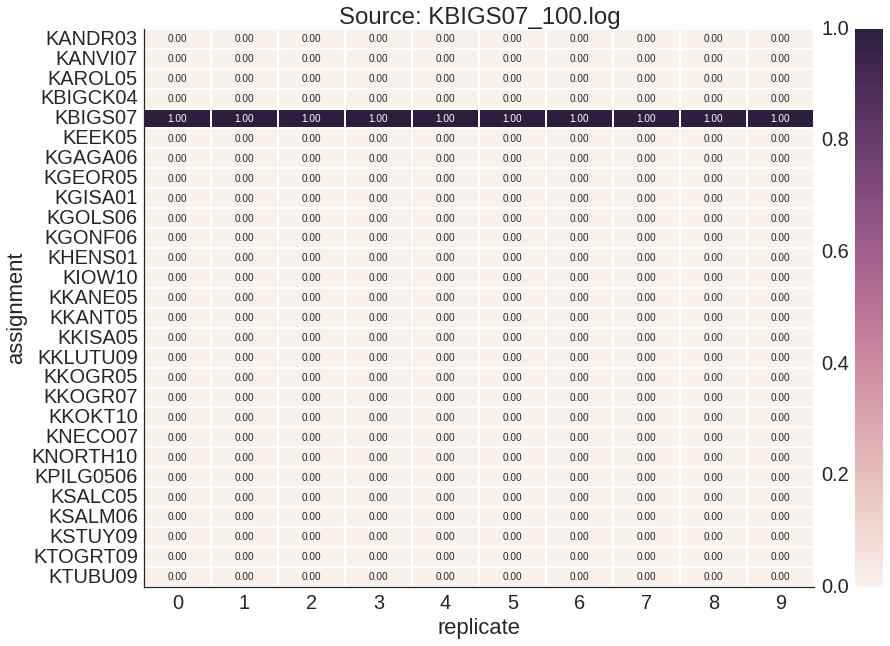

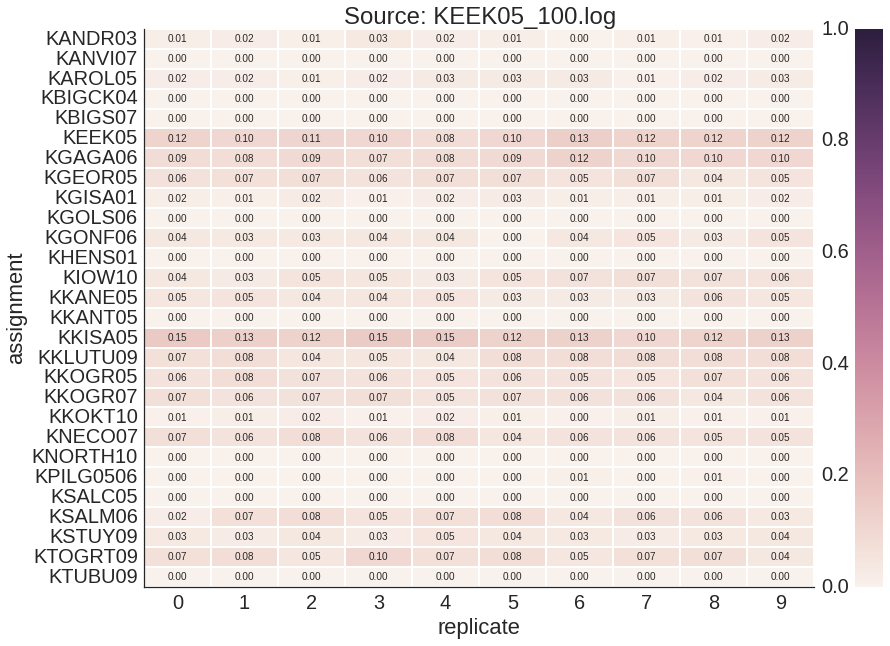

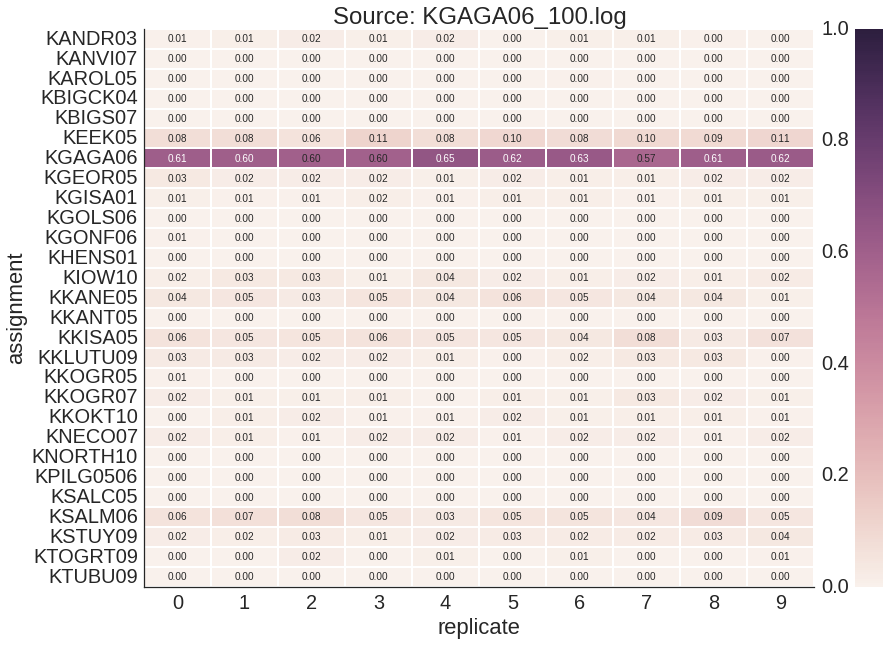

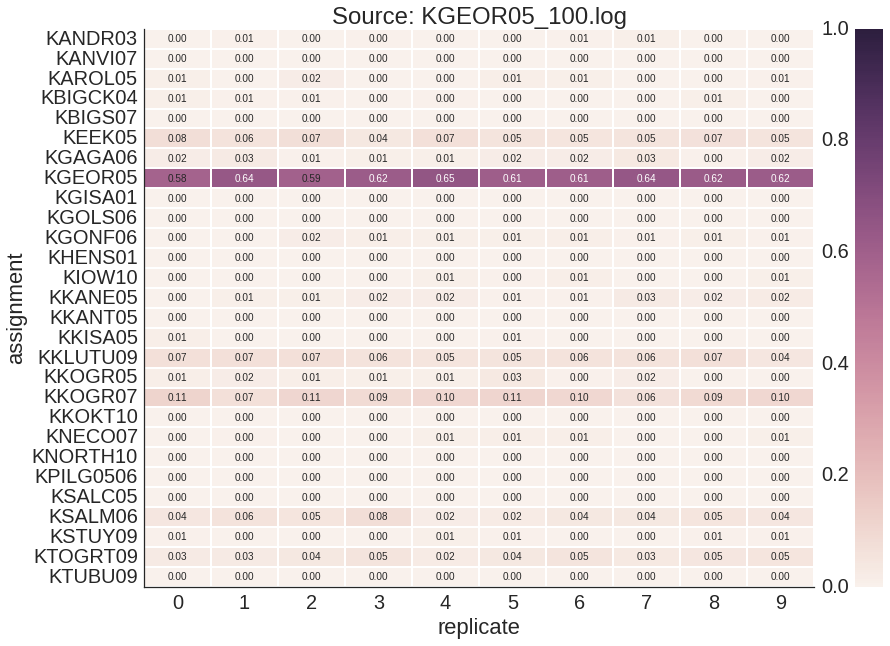

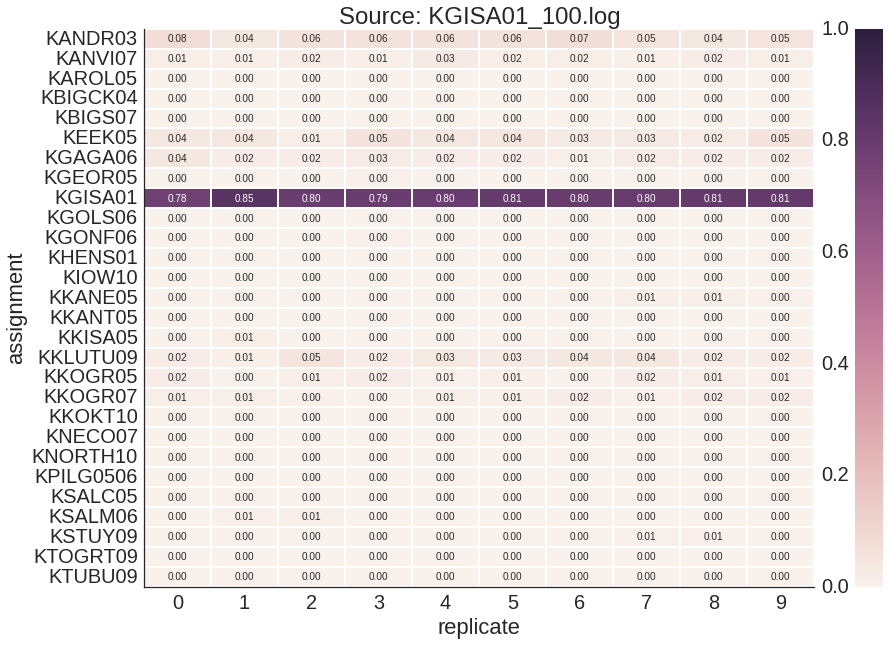

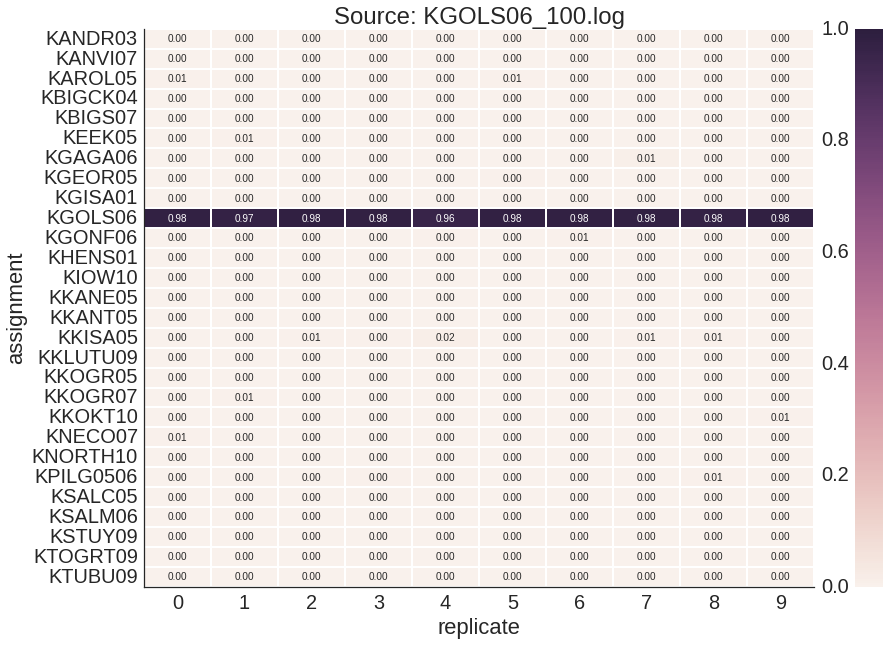

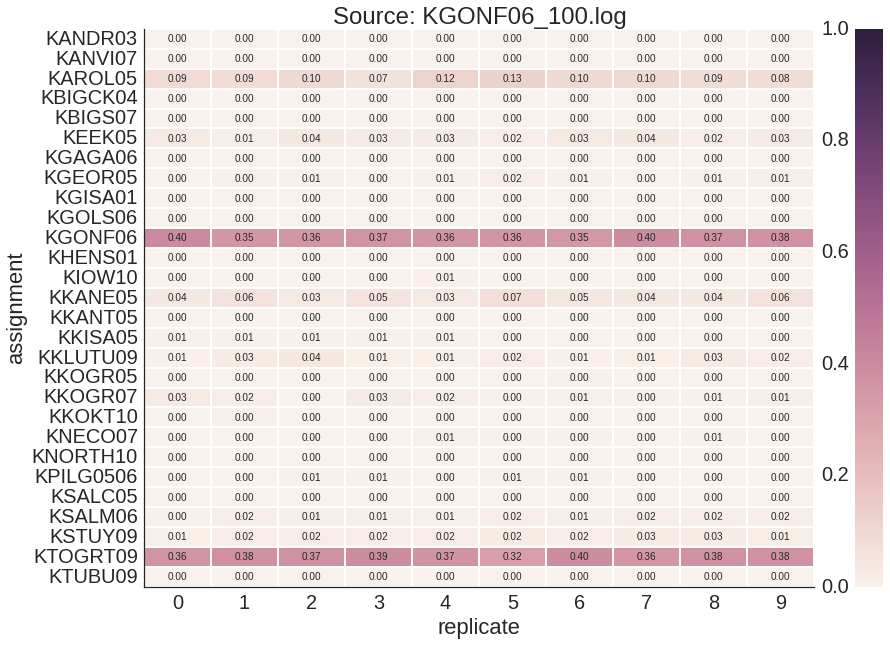

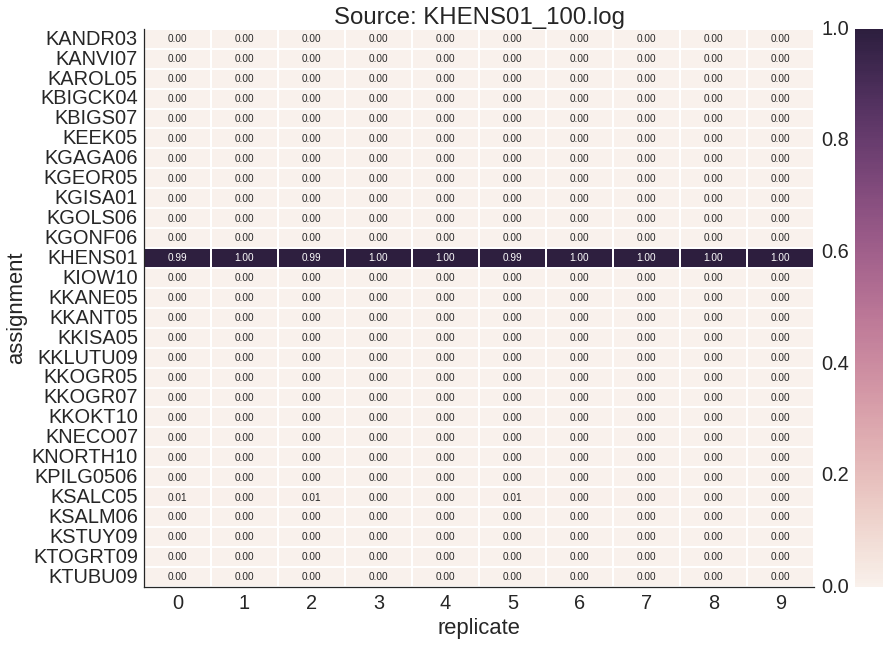

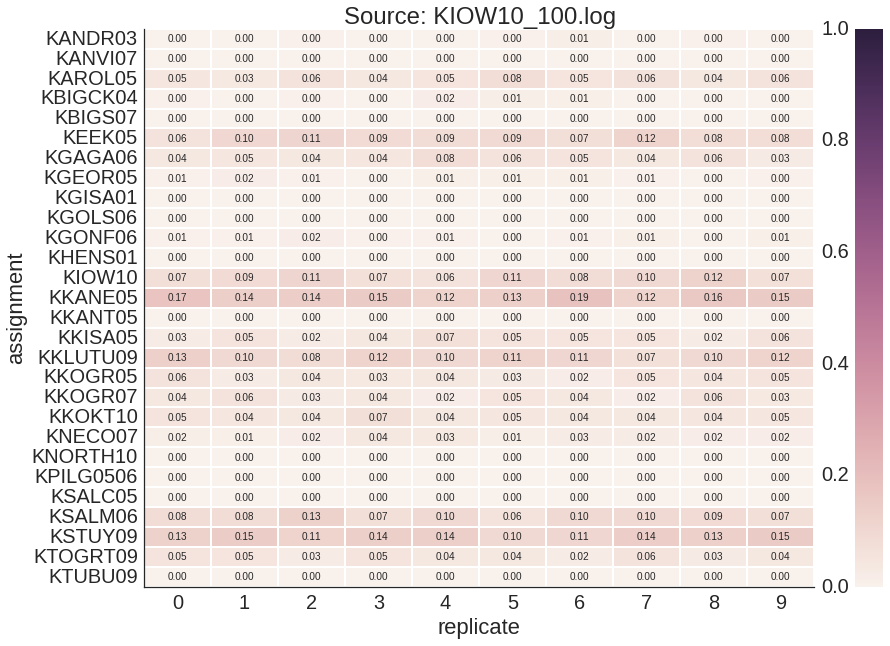

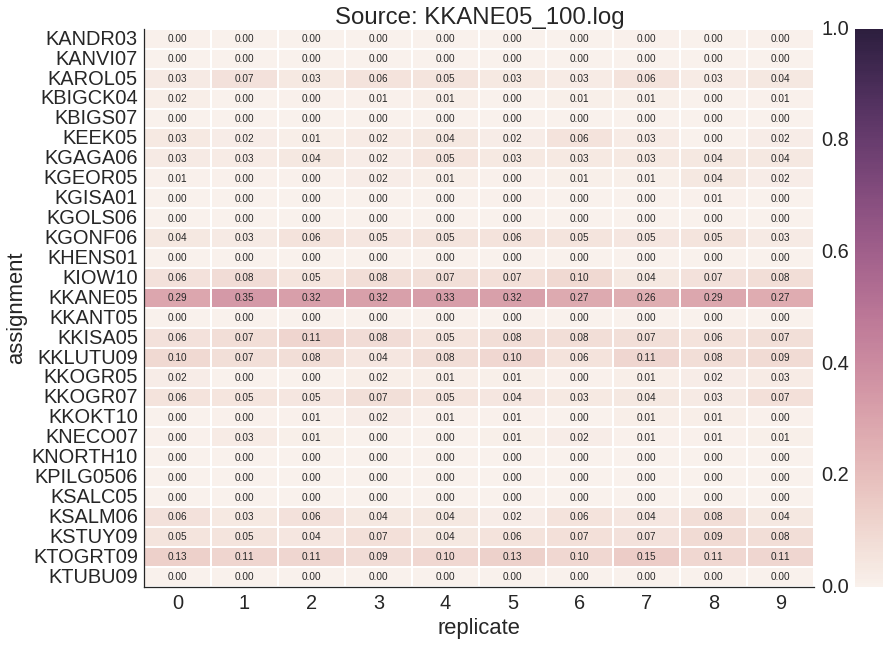

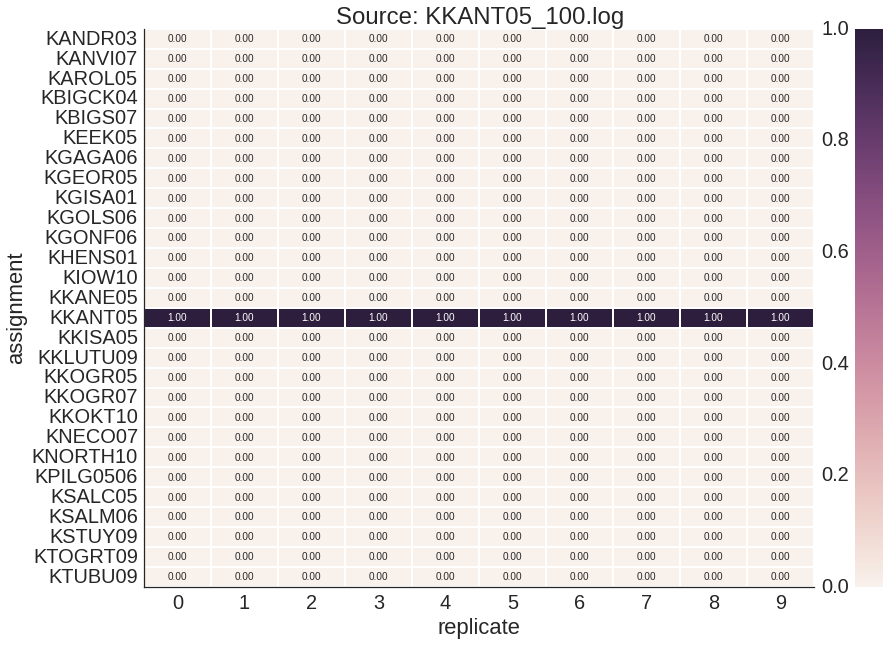

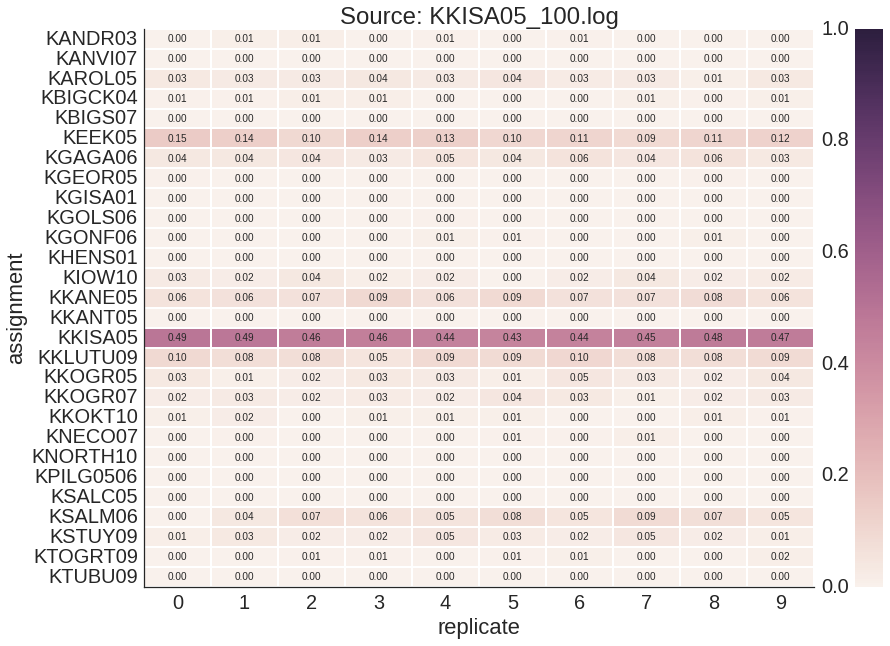

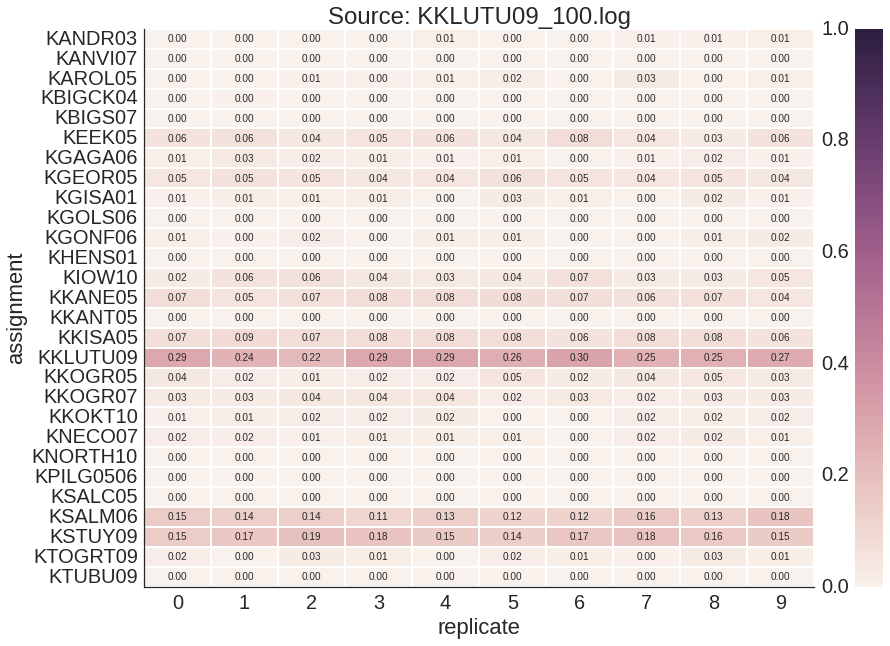

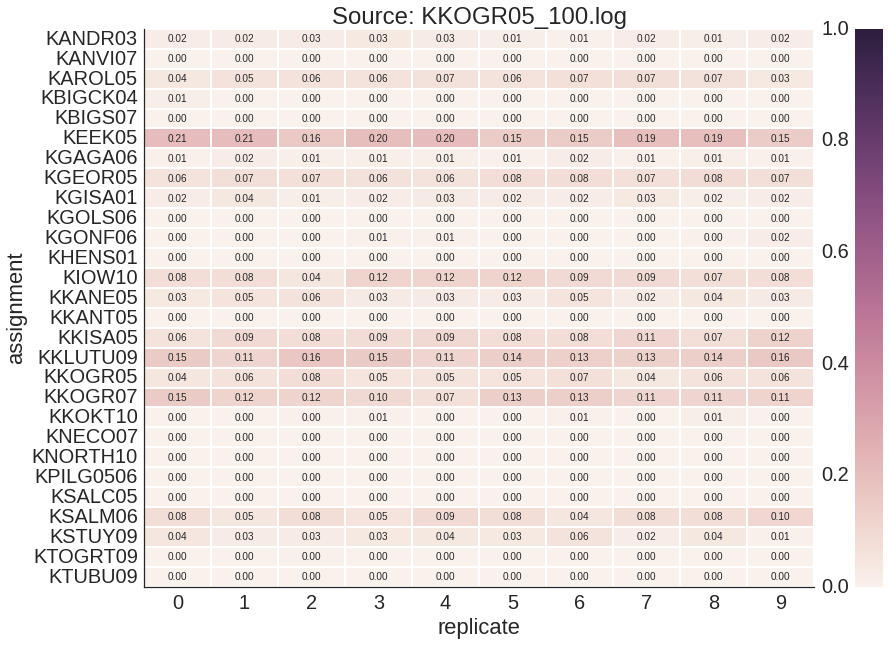

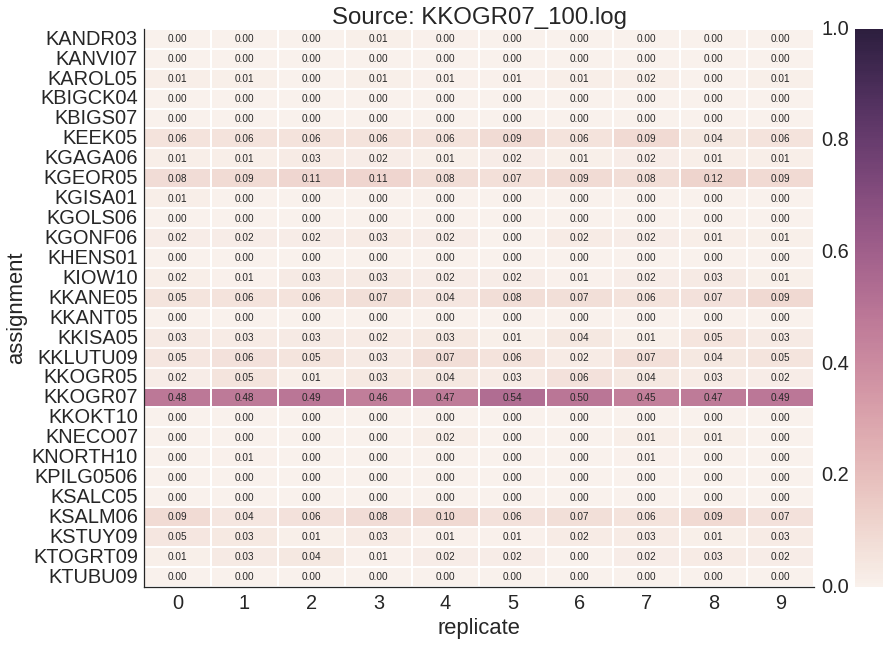

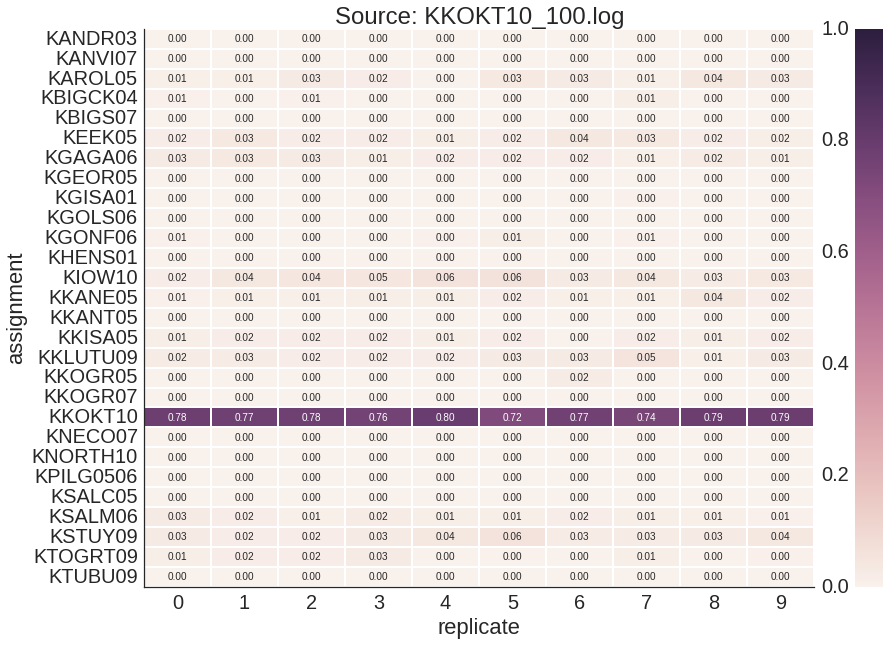

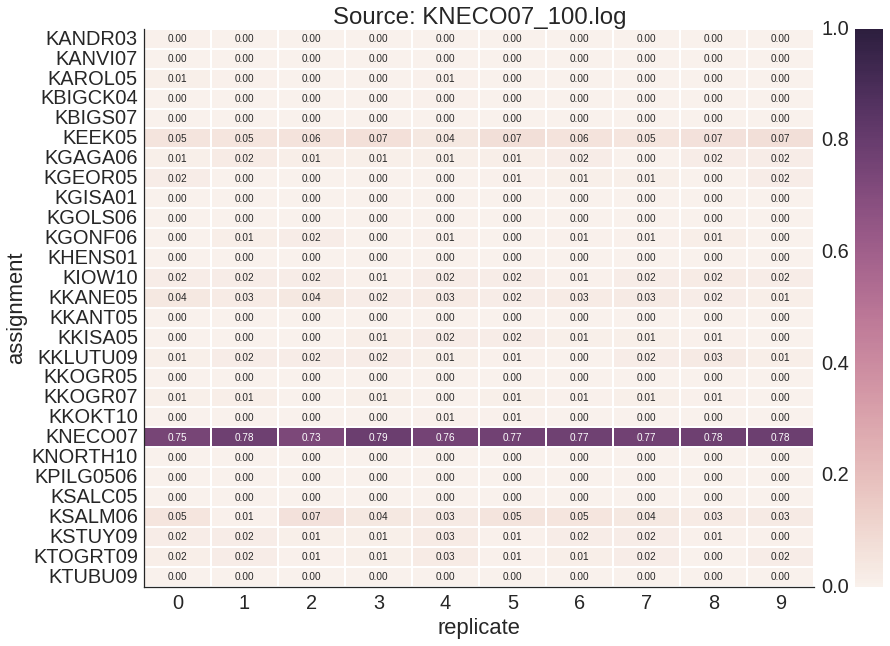

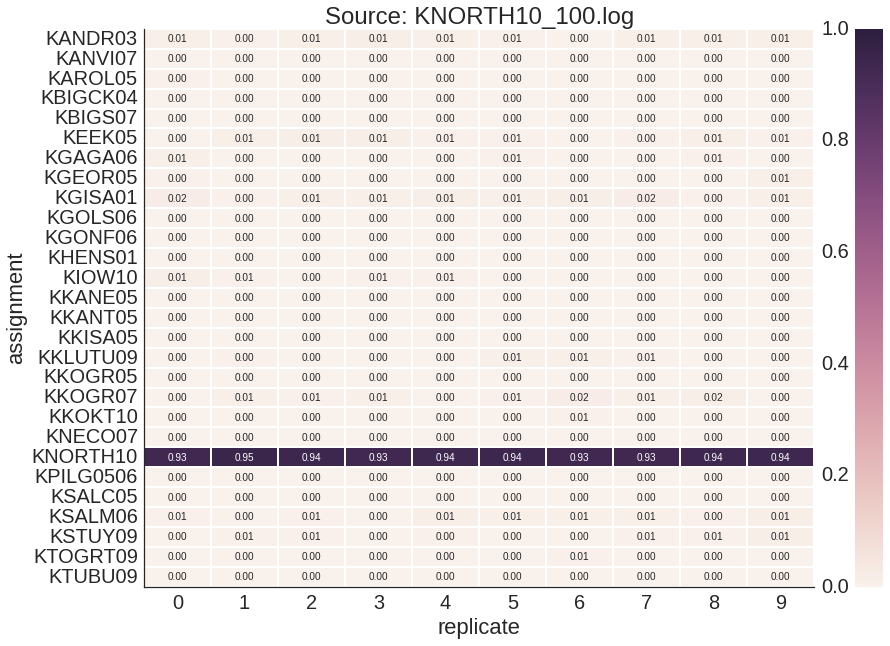

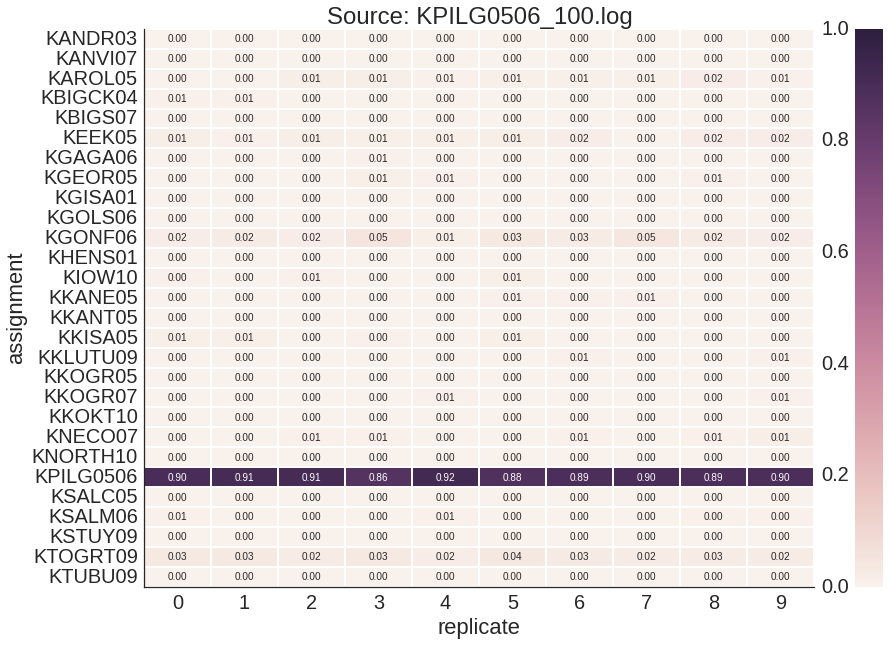

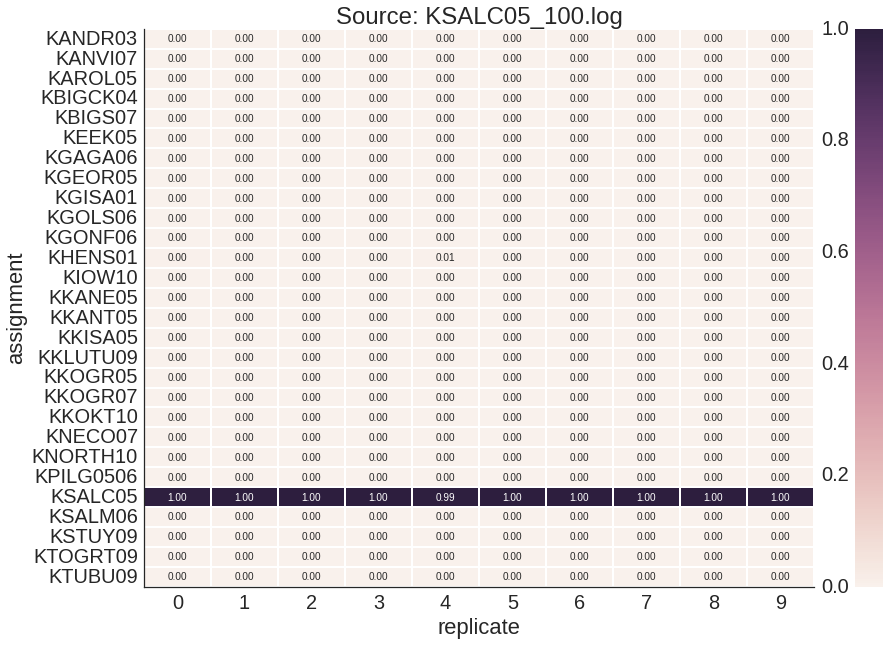

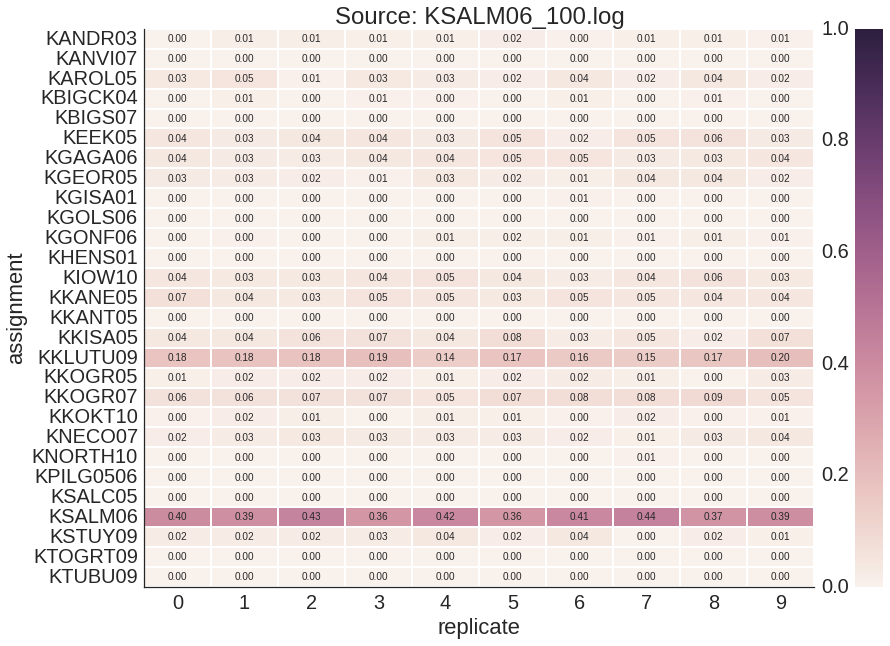

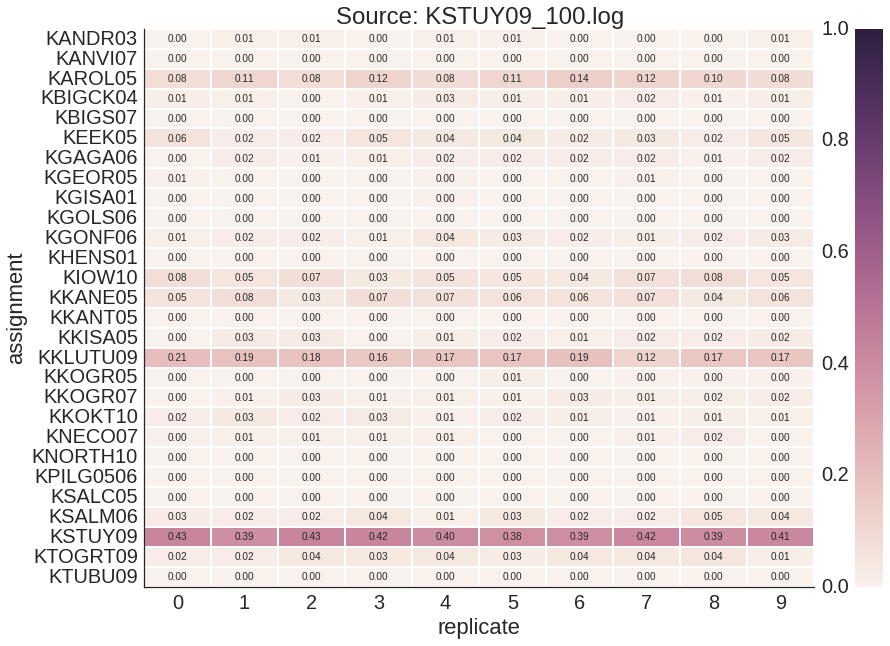

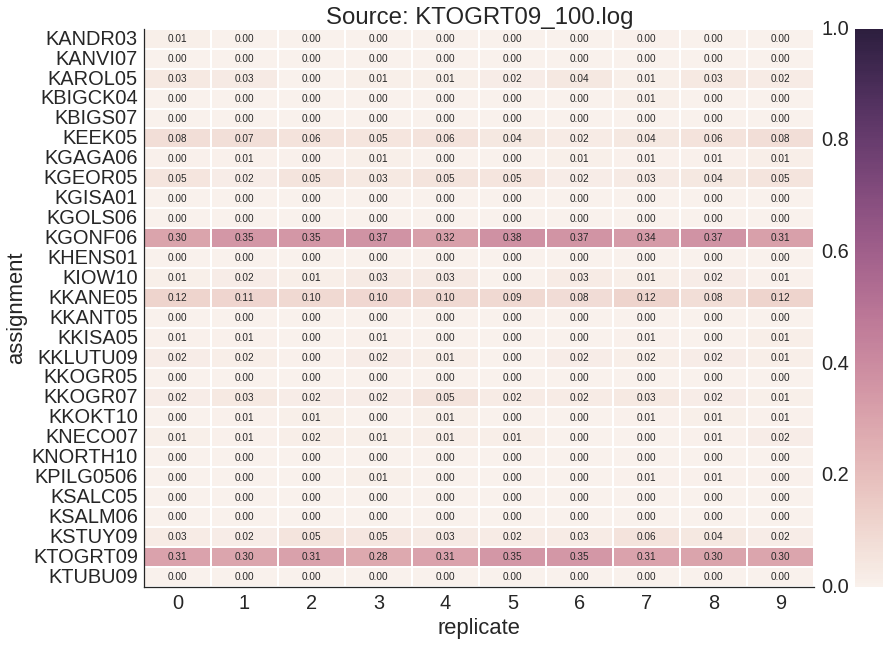

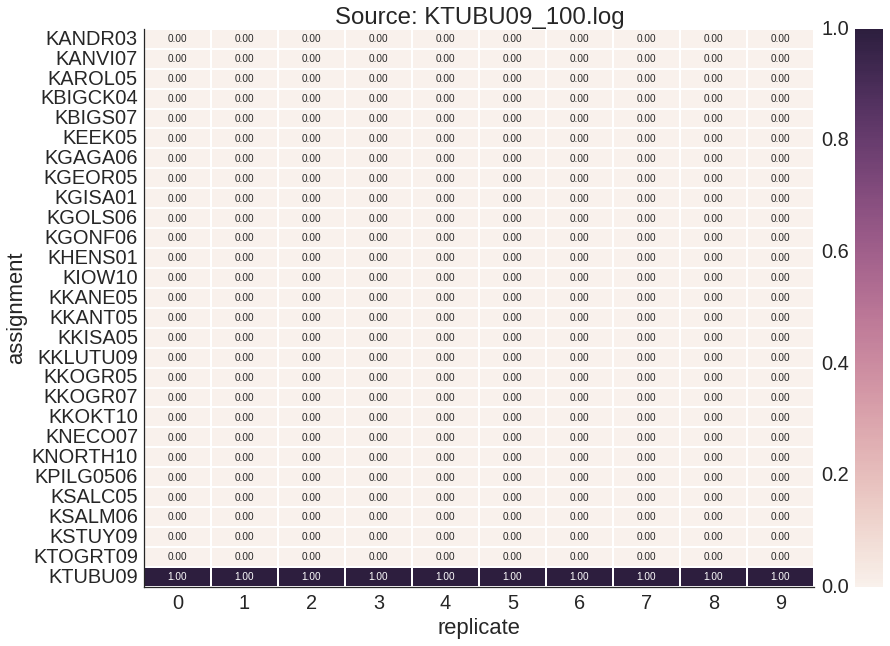

In [70]:
logfiles = !ls *_100.log
for lf in logfiles:
    plot_100_sim(lf)

#### Looking at them as a group

In [71]:
pop_names = get_popnames_MIXED_FISH('KANDR03_100.log')
mix100_lines = !grep 'MIXED_FISH_INDIVS' *_100.log

In [72]:
mix100_sim = pd.DataFrame.from_dict([get_assigns_MIXED_FISH(xx, pop_names = pop_names) for xx in mix100_lines])

### Self-assignment in 100% simualtions
Here there are 1000 simulated indiviudals from each population, sorted by relative assignment likelihood back to source.

Legend excluded due to space concerns, plot does not scale well to 28 populations, could work with reporting groups.

Could also try keeping each pop separate but *coloring* by reporting group

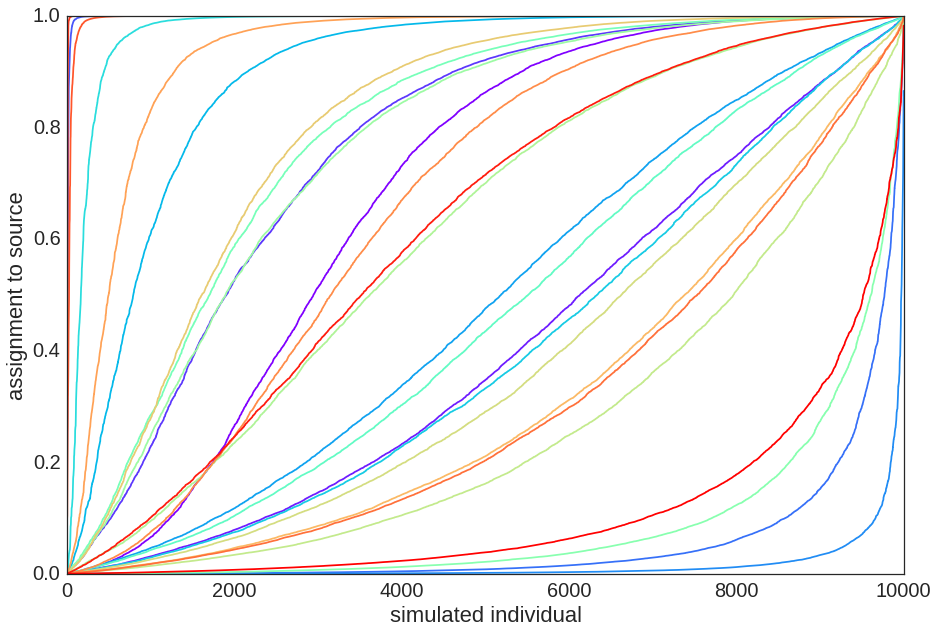

In [73]:
n = len(popnames)
color=iter(cm.rainbow(np.linspace(0,1,n)))
for ii in  range(n):
    popname = popnames[ii]
    col = next(color)
    plt.plot(sorted(mix100_sim[mix100_sim['source'] == popname]['{}'.format(popname)]), label = popname, c =col)
#plt.legend()
plt.ylabel('assignment to source')
plt.xlabel('simulated individual')
plt.show()

### Do some populations attract more assignments than others?

This same type of analysis could be conducted in other contexts.

Naively, we expect each population to attract 1000 assignments and standarize 1000 = 1.0

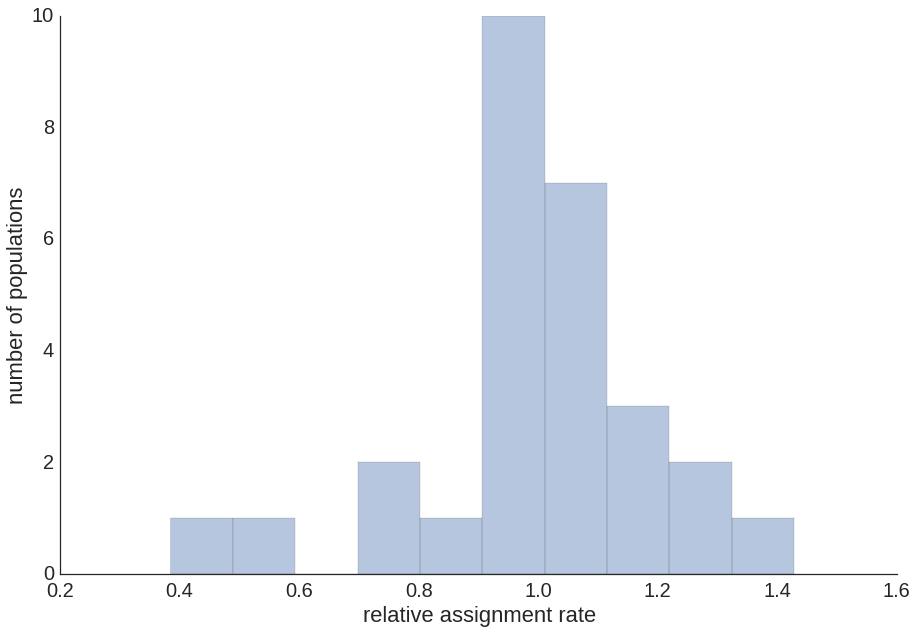

In [36]:
self_assign_to_pop = mix100_sim.mean()
self_assign_to_pop = self_assign_to_pop.drop(labels = ['ind', 'rep'])
self_assign_to_pop = self_assign_to_pop/mean(self_assign_to_pop)
sns.distplot(self_assign_to_pop, norm_hist = False, kde = False, bins = 10)
sns.despine()
plt.xlabel('relative assignment rate')
plt.ylabel('number of populations')
plt.show()

### Simulate mixed fishery samples
Here 3 populations are sampled from equally to form a mixture
    - KANDR03
    - KSTUY09
    - KGONF06
Mixture is formed by sampling from the source populations.  This analysis is run 10 times with 100 fish forming the mixture each time.  Notice this allows some amount of variation in **true** mixture proportions.  There may be a way to enforce fixed mixture proportions.

#### gsi_sim command

In [37]:
!{GSISIM_PATH} \
--baseline-genotypes ./baseline.txt \
--rep-unit-file ./reporting_groups.txt \
-n KANDR03 --Pi 1 --end-pop \
-n KSTUY09 --Pi 1 --end-pop \
-n KGONF06 --Pi 1 --end-pop \
--mixed-fishery  10 100 \
--samp-unit genes \
--leave-one-out yes \
--print-mix-genos \
> ./mix_fishery.log

#### parse output

In [38]:
pop_names = get_popnames_MIXED_FISH('KANDR03_100.log')
mix_lines = !grep 'MIXFISH_PI_MLES' mix_fishery.log

In [39]:
mix_props = pd.DataFrame.from_dict([dict(zip(pop_names, [np.float64(yy) for yy in xx.split()[1:]])) for xx in mix_lines])

Mixed fishery assignments:

    3 source populations
    - KANDR03
    - KGONF06
    - KSTUY09


#### Assignment matrix of simulated mixtures

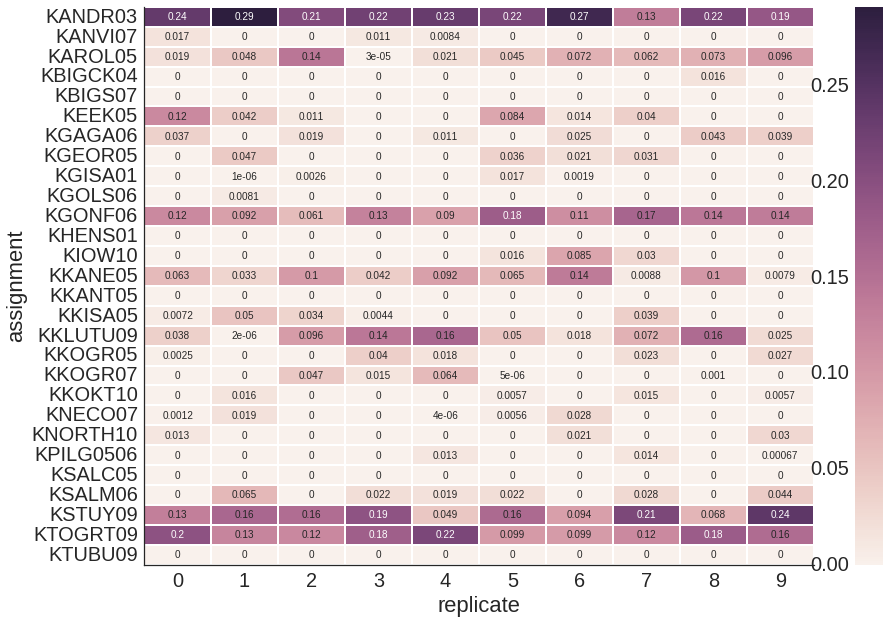

In [40]:
figsize(15,10)
sns.heatmap(mix_props.T,annot=True )
plt.xlabel('replicate')
plt.ylabel('assignment')
sns.despine()
plt.show()

## Bayesian mixture analysis (MCMC)
here I am using the baseline as a "mixture"

#### gsi_sim command

In [41]:
!{GSISIM_PATH} \
--baseline-genotypes ./baseline.txt \
--rep-unit-file ./reporting_groups.txt \
--mixture-genotypes ./baseline.txt \
--mcmc-sweeps 999 \
--pi-trace-interval 20 \
--zsum-trace-interval 20 \
--ind-trace-int 20 \
> ./mix_bayes_fishery.log

(This produces 18 separate output files)

#### mixture fractions (reporting units)
error bars are 2x std deviation.

In [42]:
bay_mix_pi = pd.read_csv('rep_unit_pi_posterior_means.txt', sep = "\t", comment='#')

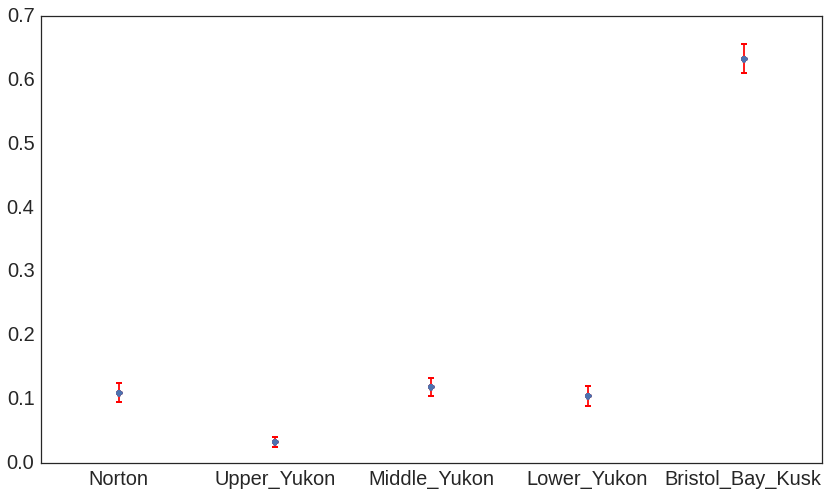

In [43]:
figsize(14,8)
plt.errorbar(x = bay_mix_pi.index.values , y = bay_mix_pi['Mean.Pi'], yerr = 2*bay_mix_pi['St.Dev.of.Pis'], fmt='o', 
             color = 'red', ecolor='r', capthick=2)
plt.plot(bay_mix_pi['Mean.Pi'], 'o')
plt.xticks(bay_mix_pi.index.values, bay_mix_pi['RepUnit'])
plt.xlim(-.5, 4.5)
plt.show()

### Comparing bayesian and EM results

#### pofz - (individual genotypes - scaled likelihoods of originating from each unit)

In [44]:
b_pofz = pd.read_csv('rep_unit_pofz_posterior_means.txt', comment = "#", sep ='\t')
b_pofz = b_pofz[b_pofz['ValueType'] == 'Posterior.Mean']
#b_pofz.head()

In [45]:
em_pofz = pd.read_csv('rep_unit_pofz_full_em_mle.txt', comment = "#", sep ='\t')
#em_pofz.head()

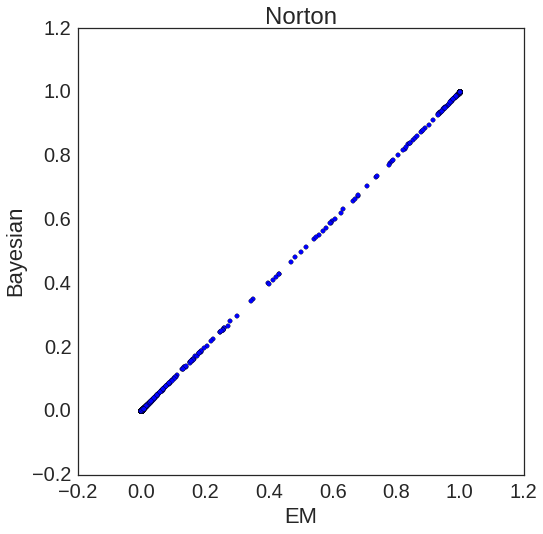

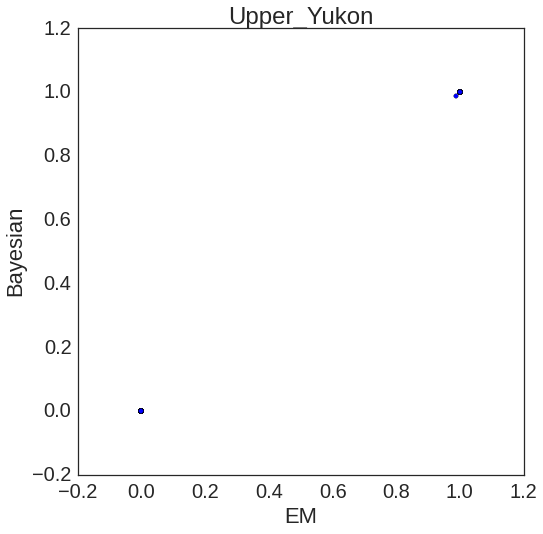

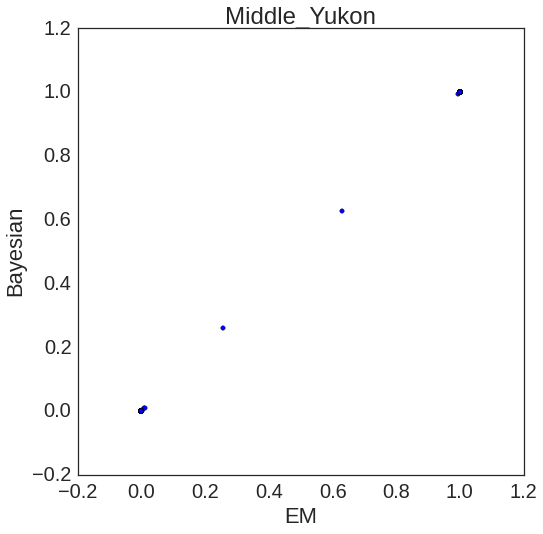

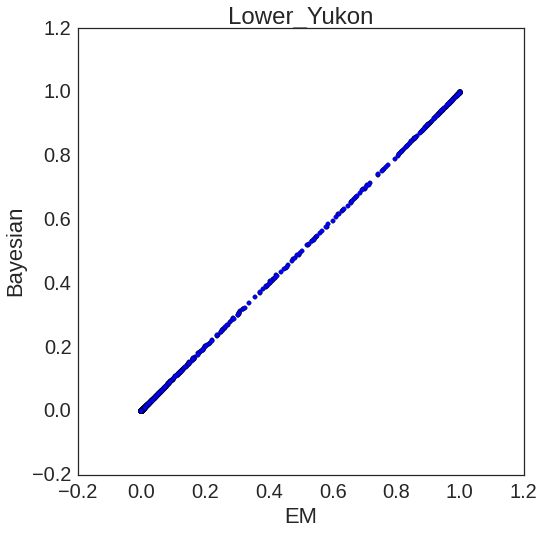

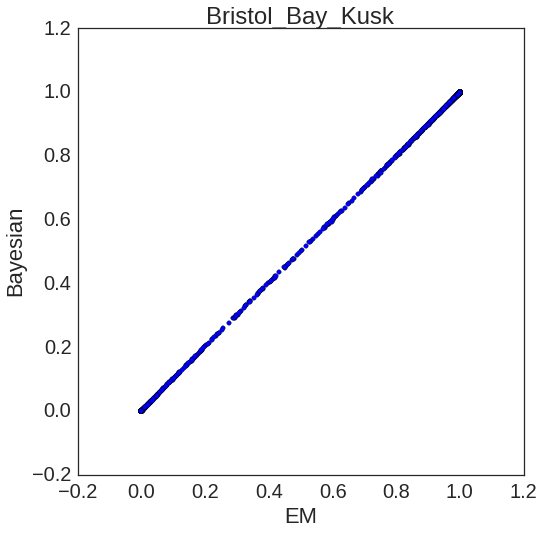

In [46]:
figsize(8,8)
for pop in ['Norton','Upper_Yukon','Middle_Yukon','Lower_Yukon','Bristol_Bay_Kusk']:
    plt.scatter(em_pofz['{}'.format(pop)], b_pofz['{}'.format(pop)], label = pop)
    plt.xlabel('EM')
    plt.ylabel('Bayesian')
    plt.title(pop)
    plt.show()
    
#plt.legend()
#plt.show()

#### Mixture proportions

In [47]:
em_pi = pd.read_csv('rep_unit_pi_full_em_mle.txt', sep='\t', comment = '#')
em_pi.head()

RepUnit    Est.Pi
0            Norton  0.110246
1       Upper_Yukon  0.032522
2      Middle_Yukon  0.119077
3       Lower_Yukon  0.104427
4  Bristol_Bay_Kusk  0.633728

In [48]:
b_pi = pd.read_csv('rep_unit_pi_posterior_means.txt', sep='\t', comment = '#')
b_pi.head()

RepUnit   Mean.Pi  St.Dev.of.Pis
0            Norton  0.110157       0.007206
1       Upper_Yukon  0.032728       0.003689
2      Middle_Yukon  0.118808       0.006972
3       Lower_Yukon  0.104341       0.007732
4  Bristol_Bay_Kusk  0.633965       0.011263

# Terms
    - Pi - mixture fractions (0-1)
    - PofZ - (individual genotypes - scaled likelihoods of originating from each unit)
    - zsum - estimated fish count in mixture (integers)
    

# TODO
    - population priors
    - loss function
    - better parsing of bayesisan MCMC and EM output
    - simulation/leave one out results by reporting group
    - color by reporting groups / populations